Imports

In [21]:
import pandas as pd

Access files from this path: "C:\Users\Daniel Price\Documents\Documents\Exeter\Data_Science_in_Economics\Empirical_Project\Data"

for each file, from 2000-01 to 2021-22 (inclusive), do the following:
Convert the csv file to a pandas dataframe
Since each year is the same data, but for a different year, we can concatenate the dataframes together.

In [22]:
import os
import pandas as pd
import re

# Function to parse dates adaptively
def parse_dates(dates):
    # Checking the year format based on length and adjusting accordingly
    if len(dates[0].split('/')[-1]) == 2:
        return pd.to_datetime(dates, format='%d/%m/%y')
    elif len(dates[0].split('/')[-1]) == 4:
        return pd.to_datetime(dates, format='%d/%m/%Y')
    else:
        # Fallback to infer the format if unexpected length
        return pd.to_datetime(dates, infer_datetime_format=True)

# Data directory
data = r"C:\Users\Daniel Price\Documents\GitHub\Effects-of-VAR-on-English-FootballFootball\Data"

# Get the list of files in the data directory
file_list = os.listdir(data)

# Initialize an empty dataframe to store the concatenated data
concatenated_df = pd.DataFrame()

# Define the pattern for the file names
pattern = re.compile(r'^\d{4}-\d{2}\.csv$')

# Initialize a counter for the number of files converted
file_count = 0

# Iterate over each file
for file_name in file_list:
    # Check if the file matches the pattern for a CSV file
    if pattern.match(file_name):
        # Construct the file path
        file_path = os.path.join(data, file_name)
        
        # Read the CSV file into a dataframe, explicitly parsing the date
        df = pd.read_csv(file_path, parse_dates=['Date'], date_parser=parse_dates)
        
        # Concatenate the dataframe to the existing data
        concatenated_df = pd.concat([concatenated_df, df])

        # Increment the counter
        file_count += 1

# Print the concatenated dataframe
print(concatenated_df)

# Print the number of files converted
print(f"Number of files converted: {file_count}")


The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
The argument 'date_parser' is deprecated and will be removed in a future version

    Div       Date     HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0    E0 2000-08-19     Charlton        Man City     4     0   H     2     0   
1    E0 2000-08-19      Chelsea        West Ham     4     2   H     1     0   
2    E0 2000-08-19     Coventry   Middlesbrough     1     3   A     1     1   
3    E0 2000-08-19        Derby     Southampton     2     2   D     1     2   
4    E0 2000-08-19        Leeds         Everton     2     0   H     2     0   
..   ..        ...          ...             ...   ...   ...  ..   ...   ...   
318  E0 2024-04-13  Bournemouth      Man United     2     2   D     2     1   
319  E0 2024-04-14    Liverpool  Crystal Palace     0     1   A     0     1   
320  E0 2024-04-14     West Ham          Fulham     0     2   A     0     1   
321  E0 2024-04-14      Arsenal     Aston Villa     0     2   A     0     0   
322  E0 2024-04-15      Chelsea         Everton     6     0   H     4     0   

    HTR  ...  AvgC<2.5  AHCh  B365CAHH  B365CAHA  P

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.


VAR was implemented after in the 2019/20 season, so we will mark the data which had VAR with a 1, and the data which did not have VAR with a 0. We will make a new column called 'VAR' which will have this information.

In [23]:
# Convert 'Date' column to datetime format, handling unparseable dates by setting them as NaT
concatenated_df['Date'] = pd.to_datetime(concatenated_df['Date'], format='%d/%m/%Y', errors='coerce')

# Identify rows where the date conversion resulted in NaT
nat_dates = concatenated_df[concatenated_df['Date'].isna()]

# Print the count of NaT entries
print(f"Number of unparseable dates set as NaT: {nat_dates.shape[0]}")

# If there are any NaT values, print them out
if not nat_dates.empty:
    print("List of unparseable dates:")
    print(nat_dates['Date'])  # This will only show NaT, for actual date strings causing issues, you should print another column if available

# Define the date for VAR implementation
var_start_date = pd.Timestamp('2019-06-01')

# Add a 'VAR' column based on the year extracted from the 'date'. VAR implemented from 2019 onwards.
concatenated_df['VAR'] = concatenated_df['Date'].apply(lambda x: 1 if x >= var_start_date else 0)

# Print the concatenated dataframe with the new 'VAR' column
print(concatenated_df)

# Print the number of matches listed as having VAR
print(f"Number of matches listed as having VAR: {concatenated_df['VAR'].sum()}")

# Write the concatenated dataframe to a CSV file in the same directory as the datasets
data_path = r"C:\Users\Daniel Price\Documents\GitHub\Effects-of-VAR-on-English-FootballFootball\Data"
concatenated_df.to_csv(os.path.join(data, 'combined_data.csv'), index=False)

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Number of unparseable dates set as NaT: 0
    Div       Date     HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0    E0 2000-08-19     Charlton        Man City     4     0   H     2     0   
1    E0 2000-08-19      Chelsea        West Ham     4     2   H     1     0   
2    E0 2000-08-19     Coventry   Middlesbrough     1     3   A     1     1   
3    E0 2000-08-19        Derby     Southampton     2     2   D     1     2   
4    E0 2000-08-19        Leeds         Everton     2     0   H     2     0   
..   ..        ...          ...             ...   ...   ...  ..   ...   ...   
318  E0 2024-04-13  Bournemouth      Man United     2     2   D     2     1   
319  E0 2024-04-14    Liverpool  Crystal Palace     0     1   A     0     1   
320  E0 2024-04-14     West Ham          Fulham     0     2   A     0     1   
321  E0 2024-04-14      Arsenal     Aston Villa     0     2   A     0     0   
322  E0 2024-04-15      Chelsea         Everton     6     0   H     4     0   

    HTR  

Check for columns with missing data

In [24]:
# Check for columns without NaN values
no_nan_columns = concatenated_df.columns[concatenated_df.notna().all()].tolist()

print("Columns without NaN values:", no_nan_columns)

Columns without NaN values: ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR', 'VAR']


How have fouls been afected?

       Season  Total_Home_Fouls  Total_Away_Fouls  Total_Home_Yellows  \
0   2000/2001              4932              5299                 512   
1   2001/2002              4891              5221                 479   
2   2002/2003              4791              4875                 500   
3   2003/2004              4742              5051                 481   
4   2004/2005              4730              5186                 421   
5   2005/2006              4938              5060                 499   
6   2006/2007              4686              4834                 530   
7   2007/2008              4570              4696                 511   
8   2008/2009              4300              4525                 515   
9   2009/2010              4423              4771                 526   
10  2010/2011              4175              4343                 537   
11  2011/2012              3830              3908                 523   
12  2012/2013              3895              4058  

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


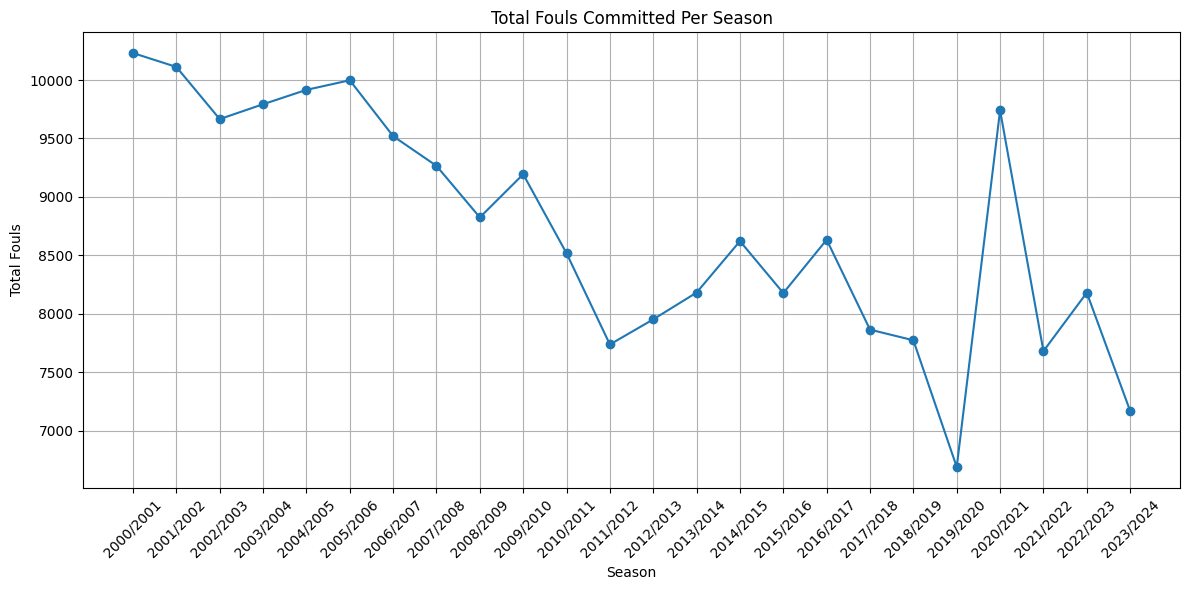

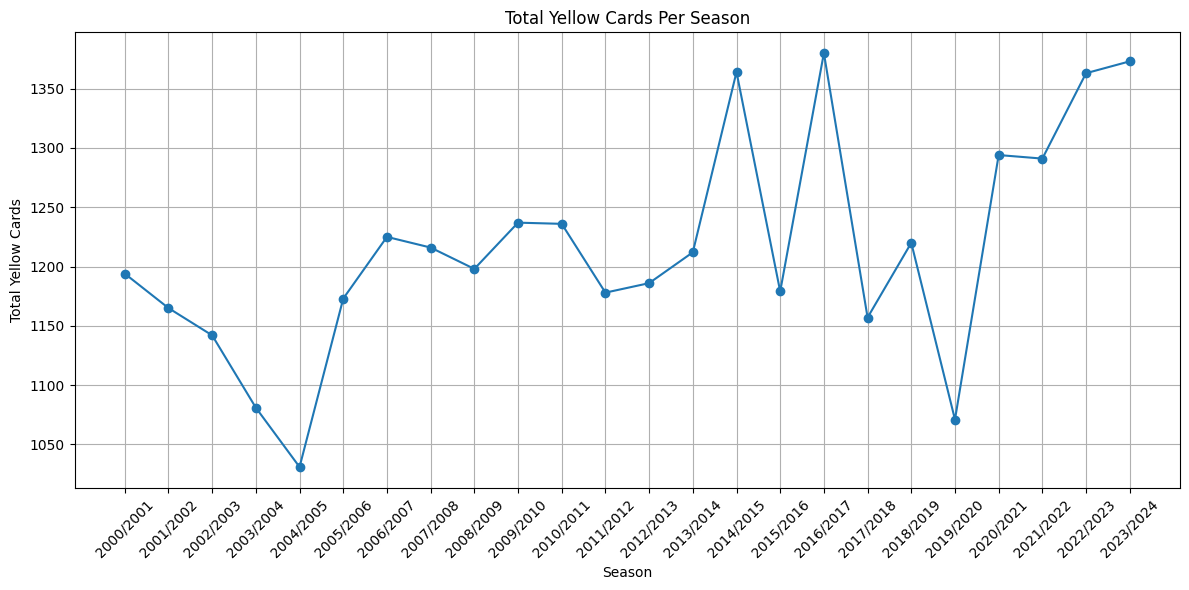

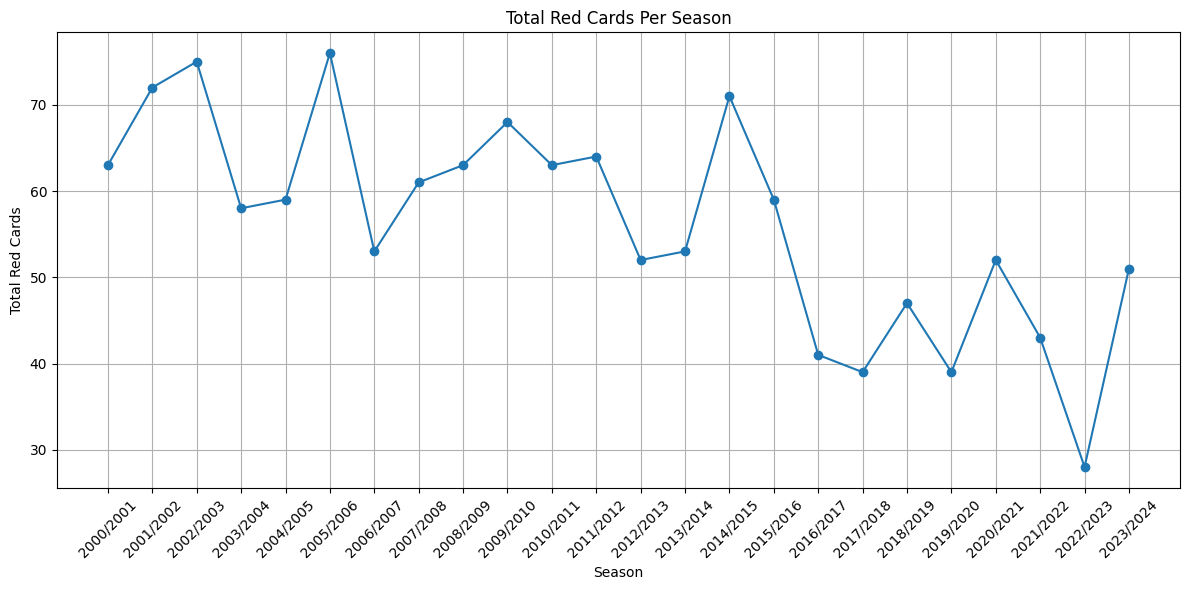

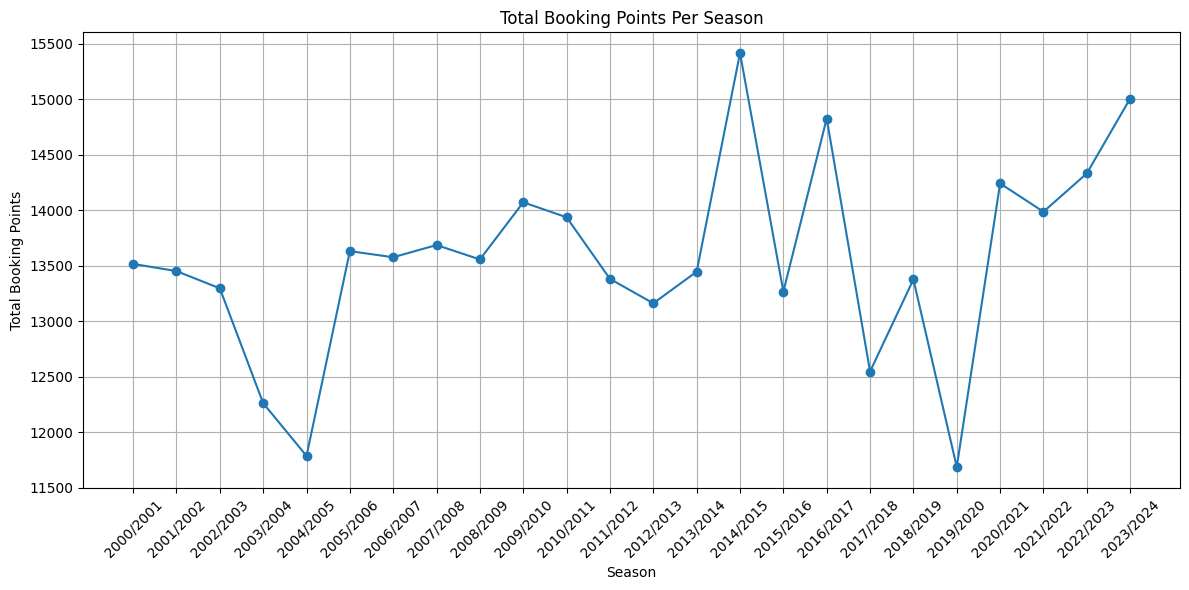

In [25]:
import matplotlib.pyplot as plt

# Plot a graph of fouls committed per season

# Function to determine the season based on the date
def get_season(date):
    if date.month > 6:
        return f"{date.year}/{date.year + 1}"
    else:
        return f"{date.year - 1}/{date.year}"
    
# Add a 'Season' column based on the date
concatenated_df['Season'] = concatenated_df['Date'].apply(get_season)

# Calculate the booking points before grouping
concatenated_df['Home_BookingPoints'] = concatenated_df['HY'] * 10 + concatenated_df['HR'] * 25
concatenated_df['Away_BookingPoints'] = concatenated_df['AY'] * 10 + concatenated_df['AR'] * 25

# Group the data by season and sum the fouls committed
concatenated_df_grouped = concatenated_df.groupby('Season').agg(
    Total_Home_Fouls=('HF', 'sum'),
    Total_Away_Fouls=('AF', 'sum'),
    Total_Home_Yellows=('HY', 'sum'),
    Total_Away_Yellows=('AY', 'sum'),
    Total_Home_Reds=('HR', 'sum'),
    Total_Away_Reds=('AR', 'sum'),
    
    # Sum the booking points
    Total_Home_BookingPoints=('Home_BookingPoints', 'sum'),
    Total_Away_BookingPoints=('Away_BookingPoints', 'sum')
)

# Calculate the total fouls by adding the home and away fouls
concatenated_df_grouped['Total_Fouls'] = concatenated_df_grouped['Total_Home_Fouls'] + concatenated_df_grouped['Total_Away_Fouls']
concatenated_df_grouped['Total_Yellows'] = concatenated_df_grouped['Total_Home_Yellows'] + concatenated_df_grouped['Total_Away_Yellows']
concatenated_df_grouped['Total_Reds'] = concatenated_df_grouped['Total_Home_Reds'] + concatenated_df_grouped['Total_Away_Reds']
concatenated_df_grouped['Total_BookingPoints'] = concatenated_df_grouped['Total_Home_BookingPoints'] + concatenated_df_grouped['Total_Away_BookingPoints']

# Reset index to make 'Season' a column again if necessary
concatenated_df_grouped.reset_index(inplace=True)

# Display the result
print(concatenated_df_grouped)

# Mean yellow cards per season
mean_yellow_cards = concatenated_df_grouped['Total_Yellows'].mean()
print(f"Mean yellow cards per season: {mean_yellow_cards:.2f}")

# Mean red cards per season
mean_red_cards = concatenated_df_grouped['Total_Reds'].mean()
print(f"Mean red cards per season: {mean_red_cards:.2f}")


# Plotting the fouls committed per season
plt.figure(figsize=(12, 6))
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Total_Fouls'], marker='o')
plt.title('Total Fouls Committed Per Season')
plt.xlabel('Season')
plt.ylabel('Total Fouls')
plt.xticks(rotation=45)  # Rotate season labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

# Plotting the yellows per season
plt.figure(figsize=(12, 6))
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Total_Yellows'], marker='o')
plt.title('Total Yellow Cards Per Season')
plt.xlabel('Season')
plt.ylabel('Total Yellow Cards')
plt.xticks(rotation=45)  # Rotate season labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

# Plotting the reds per season
plt.figure(figsize=(12, 6))
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Total_Reds'], marker='o')
plt.title('Total Red Cards Per Season')
plt.xlabel('Season')
plt.ylabel('Total Red Cards')
plt.xticks(rotation=45)  # Rotate season labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

# Plotting the booking points per season
plt.figure(figsize=(12, 6))
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Total_BookingPoints'], marker='o')
plt.title('Total Booking Points Per Season')
plt.xlabel('Season')
plt.ylabel('Total Booking Points')
plt.xticks(rotation=45)  # Rotate season labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

Plotting this information for Big 6 against non-Big 6 teams, Since VAR was implemented in the 2018/19 season in only cup matches, and thus I am seeing if there is a difference in Goals commited by Big 6 teams and non-Big 6 teams in the league matches.

Goals scored

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


       Season  Total_Home_Goals  Total_Away_Goals  Total_HalfTime_Home_Goals  \
0   2000/2001               587               405                        261   
1   2001/2002               557               444                        257   
2   2002/2003               570               430                        253   
3   2003/2004               572               440                        262   
4   2004/2005               570               405                        253   
5   2005/2006               555               389                        272   
6   2006/2007               552               379                        258   
7   2007/2008               581               421                        244   
8   2008/2009               532               410                        233   
9   2009/2010               645               408                        283   
10  2010/2011               617               446                        276   
11  2011/2012               604         

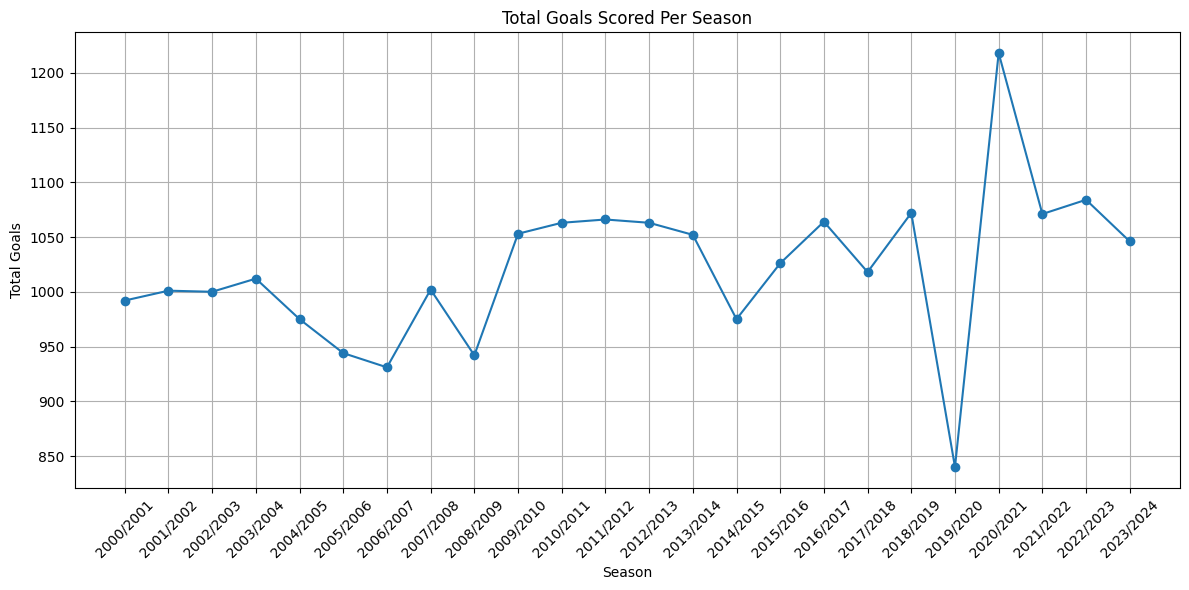

KeyError: 'Total_BookingPoints'

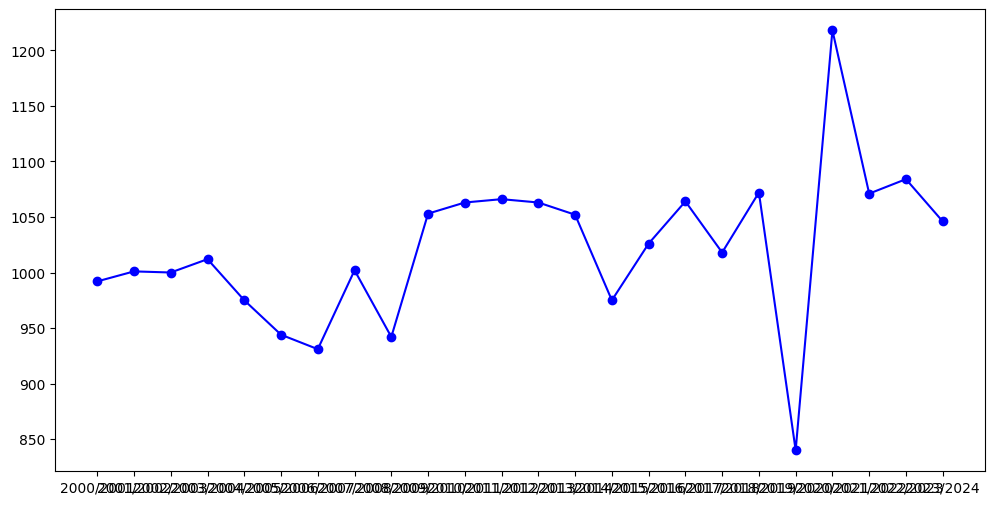

In [26]:
# Calculate second half goals before the groupby
concatenated_df['SecondHalf_Home_Goals'] = concatenated_df['FTHG'] - concatenated_df['HTHG']
concatenated_df['SecondHalf_Away_Goals'] = concatenated_df['FTAG'] - concatenated_df['HTAG']


# Group the data by season and sum the Goals committed
concatenated_df_grouped = concatenated_df.groupby('Season').agg(
    Total_Home_Goals=('FTHG', 'sum'),
    Total_Away_Goals=('FTAG', 'sum'),
    Total_HalfTime_Home_Goals=('HTHG', 'sum'),
    Total_HalfTime_Away_Goals=('HTAG', 'sum'),
    Total_SecondHalf_Home_Goals=('SecondHalf_Home_Goals', 'sum'),
    Total_SecondHalf_Away_Goals=('SecondHalf_Away_Goals', 'sum'),
)

# Calculate the total goals by adding the home and away goals
concatenated_df_grouped['Total_Goals'] = concatenated_df_grouped['Total_Home_Goals'] + concatenated_df_grouped['Total_Away_Goals']
concatenated_df_grouped['Total_HalfTime_Goals'] = concatenated_df_grouped['Total_HalfTime_Home_Goals'] + concatenated_df_grouped['Total_HalfTime_Away_Goals']
concatenated_df_grouped['Total_SecondHalf_Goals'] = concatenated_df_grouped['Total_SecondHalf_Home_Goals'] + concatenated_df_grouped['Total_SecondHalf_Away_Goals']

# Calculate the difference between first and second half goals
concatenated_df_grouped['HalfTime_SecondHalf_Goal_Diff'] = concatenated_df_grouped['Total_SecondHalf_Goals'] - concatenated_df_grouped['Total_HalfTime_Goals']

# Calculate the goal difference between home and away teams
concatenated_df_grouped['Goal_Diff'] = concatenated_df_grouped['Total_Home_Goals'] - concatenated_df_grouped['Total_Away_Goals']


# Reset index to make 'Season' a column again if necessary
concatenated_df_grouped.reset_index(inplace=True)

# Display the result
print(concatenated_df_grouped)

# Plotting the goals committed per season
plt.figure(figsize=(12, 6))
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Total_Goals'], marker='o')
plt.title('Total Goals Scored Per Season')
plt.xlabel('Season')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)  # Rotate season labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

# Plotting the goals committed per season vs the total booking points per season
plt.figure(figsize=(12, 6))
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Total_Goals'], marker='o', color='blue', label='Goals')
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Total_BookingPoints'], marker='x', color='red', label='Booking Points')
plt.title('Total Goals vs Total Booking Points Per Season')
plt.xlabel('Season')
plt.ylabel('Total Goals/Booking Points')
plt.xticks(rotation=45)  # Rotate season labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()


# Plot home and away goals on the same graph
plt.figure(figsize=(12, 6))
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Total_Home_Goals'], marker='o', color='blue', label='Home Goals')
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Total_Away_Goals'], marker='x', color='red', label='Away Goals')
plt.title('Comparison of Home vs Away Goals Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Goals')
plt.xticks(rotation=45)  # Rotate season labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

# Plotting the goal difference between home and away teams
plt.figure(figsize=(12, 6))
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Goal_Diff'], marker='o')
plt.title('Goal Difference Between Home and Away Teams Per Season')
plt.xlabel('Season')
plt.ylabel('Goal Difference')
plt.xticks(rotation=45)  # Rotate season labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()


# Plotting only the half time goals
plt.figure(figsize=(12, 6))
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Total_HalfTime_Goals'], marker='o')
plt.title('Total Half Time Goals Scored Per Season')
plt.xlabel('Season')
plt.ylabel('Total Half Time Goals')
plt.xticks(rotation=45)  # Rotate season labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

# Plotting only the second half goals
plt.figure(figsize=(12, 6))
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Total_SecondHalf_Goals'], marker='o')
plt.title('Total Second Half Goals Scored Per Season')
plt.xlabel('Season')
plt.ylabel('Total Second Half Goals')
plt.xticks(rotation=45)  # Rotate season labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

# Plotting both half time and second half goals on the same graph
plt.figure(figsize=(12, 6))
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Total_HalfTime_Goals'], marker='o', color='blue', label='First Half Goals')
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Total_SecondHalf_Goals'], marker='x', color='red', label='Second Half Goals')
plt.title('Comparison of First Half vs Second Half Goals Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Goals')
plt.xticks(rotation=45)  # Rotate season labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

# Plotting the difference between first and second half goals
plt.figure(figsize=(12, 6))
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['HalfTime_SecondHalf_Goal_Diff'], marker='o')
plt.title('Difference Between Second Half and First Half Goals Per Season')
plt.xlabel('Season')
plt.ylabel('Goal Difference')
plt.xticks(rotation=45)  # Rotate season labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()



Which type of teams have benefitted the most?

We will split teams into interesting groups:
- Newly Promoted
- Traditional Big 6

We wil also make a group of teams which have been in every season, and split them based on their overall points across all seasons

Causal Forest
We will use the causal forest model to show the effects of VAR on the number of goals scored in a match.

In [ ]:
import pandas as pd
from dowhy import CausalModel
from IPython.display import Image, display
from sklearn.model_selection import train_test_split
from econml.dml import CausalForestDML
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import LassoCV

# Assuming 'concatenated_df' is the DataFrame and is already loaded
# # Preprocess Date column
concatenated_df['Date'] = pd.to_datetime(concatenated_df['Date'])
concatenated_df['Year'] = concatenated_df['Date'].dt.year
concatenated_df['Month'] = concatenated_df['Date'].dt.month
concatenated_df['Day'] = concatenated_df['Date'].dt.day
# Add a new column for the total goals
concatenated_df['TotalGoals'] = concatenated_df['FTAG'] + concatenated_df['FTHG']


treatment = 'VAR'
outcome = 'TotalGoals'
covariates = ["Year", 'Month', 'Day', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 
              'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']


# Drop missing data 
# Combine 'treatment' with 'outcome' and 'covariates' into one list
all_variables = [treatment] + [outcome] + covariates
concatenated_df = concatenated_df.dropna(axis=0, subset=all_variables)

# Split data into train and test sets 
train, test = train_test_split(concatenated_df, test_size=0.2)

# set variables for causal forest Y=outcome, T=treatment, X=covariates, W=effect_modifiers 
Y = train[outcome]
T = train[treatment]
X = train[covariates]
W = None
X_test = test[covariates]

# Update the model parameters for causal forest
causal_forest = CausalForestDML(
    criterion='het',
    n_estimators=10000,
    min_samples_leaf=10,
    max_depth=None,
    max_samples=0.5,
    discrete_treatment=False,
    honest=True,
    inference=True,
    cv=10,
    model_t=LassoCV(),
    model_y=LassoCV()   
)

print(Y.shape)  # Check if Y is indeed multi-dimensional (i.e., (n_samples, n_targets))#
Y = train[outcome]
print(Y.head())  # Quick check to see the first few rows of Y


                      
# fit train data to causal forest model 
causal_forest.fit(Y, T, X=X, W=W)
# estimate the CATE with the test set 
causal_forest.const_marginal_ate(X_test)


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

(7250,)
114    1
342    3
238    4
342    2
52     2
Name: TotalGoals, dtype: int64


In [ ]:
# # code adapted from https://github.com/microsoft/EconML
# import shap
# from econml.dml import CausalForestDML
# import matplotlib.pyplot as plt


# # fit causal forest with default parameters 
# causal_forest = CausalForestDML()
# causal_forest.fit(Y, T, X=X, W=W)

# # calculate shap values of causal forest model 
# shap_values = causal_forest.shap_values(X)

# # Print the keys in the SHAP values dictionary
# print(shap_values.keys())

# # Print the type and keys if it's a dictionary
# print(type(shap_values['TotalGoals']))
# if isinstance(shap_values['TotalGoals'], dict):
#     print(shap_values['TotalGoals'].keys())


# # plot shap values 
# shap.summary_plot(shap_values['TotalGoals']['VAR'])